The Spark Foundation #GRIP AUG21

DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP

TASK 2: Prediction Using Unsupervised ML

Name: UPASANA SARMA

##From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
!pip install kneed
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('Iris.csv')
df.head(15)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
145    0
146    0
147    0
148    0
149    0
Length: 150, dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

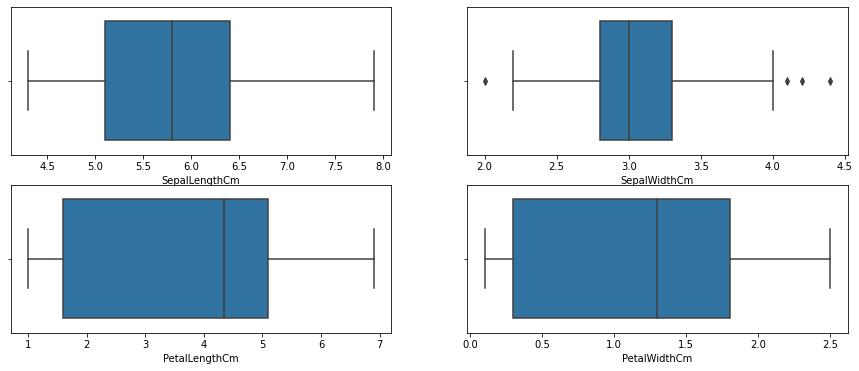

In [ ]:
plt.figure(figsize=(15,6))
feature=df.columns[1:5]
for i in enumerate(feature):
  plt.subplot(2,2,i[0]+1)
  sns.boxplot(df[i[1]])

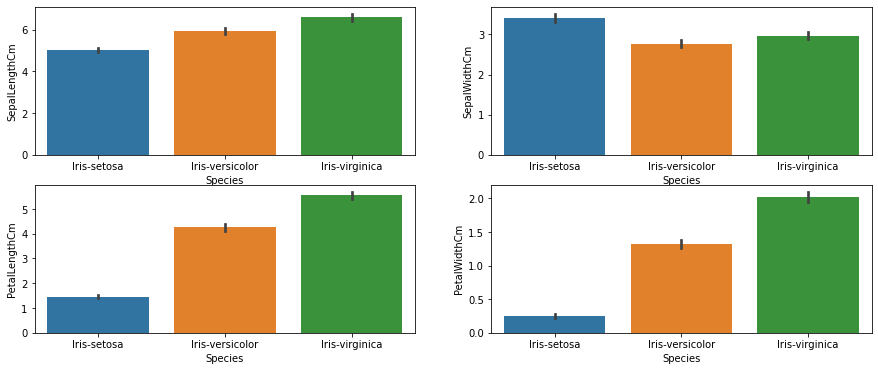

In [ ]:
plt.figure(figsize=(15,6))
feature=df.columns[1:5]
for i in enumerate(feature):
  plt.subplot(2,2,i[0]+1)
  sns.barplot(x=df.Species,y=df[i[1]])

In [ ]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [ ]:
x=df.drop(['Id','Species'], axis=1)
hopkins(x)

0.8437242226455546

In [ ]:
scaler=StandardScaler()
column_scaled=scaler.fit_transform(df.drop(['Id','Species'], axis=1))
column_scaled.shape

(150, 4)

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for k in range(1, 11):
  kmeans=KMeans(n_clusters=k, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 0 )
  kmeans.fit(column_scaled)
  wcss.append(kmeans.inertia_)

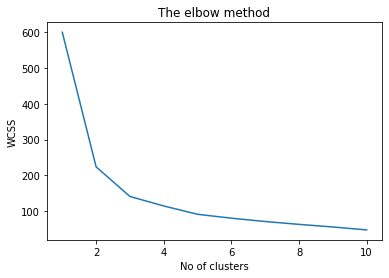

In [ ]:
plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kl=KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')
print('No of cluster:', kl.elbow)

No of cluster: 3


In [ ]:
silhouette_coefficients = []
for k in range(2, 11):
  kmeans=KMeans(n_clusters=k, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 0 )
  kmeans.fit(column_scaled)
  score=silhouette_score(column_scaled, kmeans.labels_)
  silhouette_coefficients.append(score)

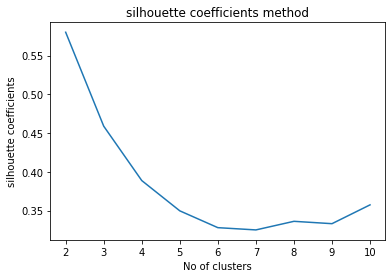

In [ ]:
plt.plot(range(2,11), silhouette_coefficients)
plt.title('silhouette coefficients method')
plt.xlabel('No of clusters')
plt.ylabel('silhouette coefficients')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=3, init='k-means++',
              n_init=10, max_iter=300, random_state=0)
y_kmeans=kmeans.fit_predict(column_scaled)

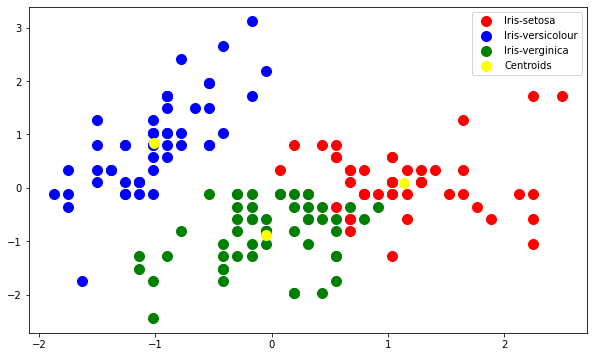

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(column_scaled[y_kmeans==0,0], column_scaled[y_kmeans==0,1], s=100, c='red', label='Iris-setosa')
plt.scatter(column_scaled[y_kmeans==1,0], column_scaled[y_kmeans==1,1], s=100, c='blue', label='Iris-versicolour')
plt.scatter(column_scaled[y_kmeans==2,0], column_scaled[y_kmeans==2,1], s=100, c='green', label='Iris-verginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

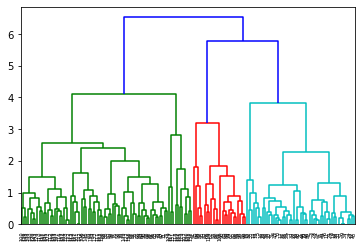

In [ ]:
margin = linkage(column_scaled, method='complete', metric='euclidean')
dendrogram(margin)
plt.show()